In [90]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

데이터 불러오고 전처리

In [91]:
data_dir = 'C:/d_data/train'

In [92]:
def load_data(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            image = tf.keras.preprocessing.image.load_img(image_path, color_mode = 'grayscale', target_size = (28,28))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(int(label))
    return np.array(images), np.array(labels)

훈련 데이터와 테스트 데이터 분리

In [80]:
train_images , train_labels = load_data(data_dir)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

CNN 적용

In [83]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

모델 컴파일

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [85]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 35.5118 - accuracy: 0.1875 - val_loss: 270.6860 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 60ms/step - loss: 199.7974 - accuracy: 0.1250 - val_loss: 223.1416 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 60ms/step - loss: 167.7525 - accuracy: 0.0625 - val_loss: 227.9441 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 62ms/step - loss: 136.8484 - accuracy: 0.1250 - val_loss: 176.7482 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 60ms/step - loss: 81.7595 - accuracy: 0.1250 - val_loss: 144.2521 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 55.7677 - accuracy: 0.1250 - val_loss: 129.0383 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 60ms/step - loss: 48.5836 - accuracy: 0.1250 - val_loss: 103.7987 - val_ac

모델 평가

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 52.7260 - accuracy: 0.0000e+00 - 39ms/epoch - 39ms/step

Test accuracy: 0.0


In [87]:
h = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1/1 [==============================] - 0s 115ms/step - loss: 22.6353 - accuracy: 0.1250 - val_loss: 41.0321 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 57ms/step - loss: 17.4111 - accuracy: 0.1875 - val_loss: 36.2665 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 57ms/step - loss: 13.4087 - accuracy: 0.0625 - val_loss: 38.3018 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 63ms/step - loss: 13.3898 - accuracy: 0.1875 - val_loss: 35.7100 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 63ms/step - loss: 11.4511 - accuracy: 0.5000 - val_loss: 31.4279 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 63ms/step - loss: 9.7780 - accuracy: 0.5000 - val_loss: 27.5532 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 63ms/step - loss: 7.8234 - accuracy: 0.4375 - val_loss: 24.6568 - val_accurac

In [88]:
h = model.history.history

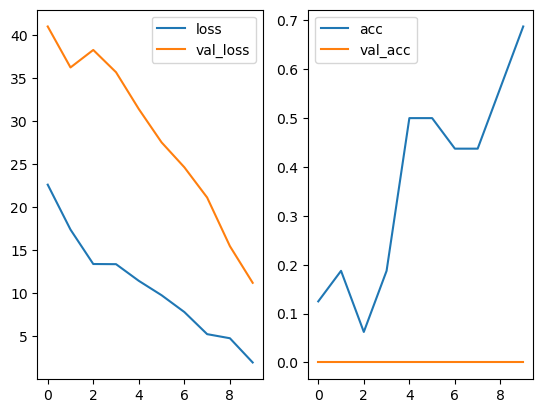

In [89]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['acc', 'val_acc'])

In [93]:
mnist = tf.keras.datasets.mnist

In [110]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [114]:
test_images , test_labels = load_data(data_dir)
test_images = test_images / 255.0

In [115]:
x_train.shape , x_test.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28), (20, 28, 28, 1))

In [116]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [117]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2212 - accuracy: 0.9341
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0959 - accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0698 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0540 - accuracy: 0.9826
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9794


[0.06894928216934204, 0.9793999791145325]

In [118]:
model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 203ms/step - loss: 20.3987 - accuracy: 0.1000


[20.398719787597656, 0.10000000149011612]

In [121]:
h = model.fit(x_train, y_train, epochs = 10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 18.3315 - val_accuracy: 0.2000
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 26.5257 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 25.0400 - val_accuracy: 0.0500
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 28.3517 - val_accuracy: 0.0500
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 29.1408 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 28.3325 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0193 - accuracy: 0.9932 - val_loss: 31.9329 -

In [122]:
h = model.history.history

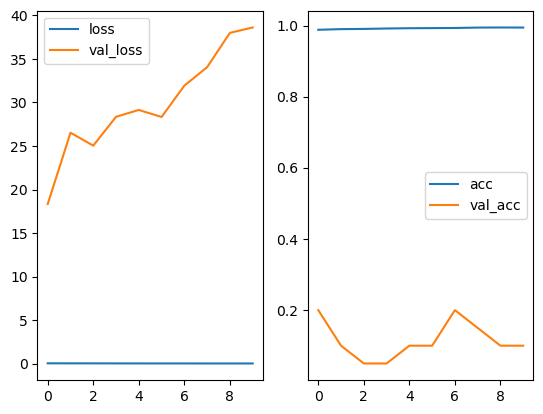

In [123]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.legend(['acc', 'val_acc'])